## Import all necessry libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Create the dataset

In [2]:
val1 = np.random.normal(loc=30,scale=8,size=200)
val2 = np.random.normal(loc=30,scale=8,size=200)
val3 = np.random.normal(loc=40,scale=3,size=200)

val4 = np.random.normal(loc=70,scale=5,size=200)
val5 = np.random.normal(loc=50,scale=10,size=200)
val6 = np.random.normal(loc=90,scale=10,size=200)

val7 = np.random.normal(loc=10,scale=20,size=200)
val8 = np.random.normal(loc=100,scale=10,size=200)
val9 = np.random.normal(loc=120,scale=7,size=200)

df1=pd.DataFrame({
    "val1":val1,
    "val2":val2,
    "val3":val3,
    "cls":0,
})
df2=pd.DataFrame({
    "val1":val4,
    "val2":val5,
    "val3":val6,
    "cls":1,
})
df3=pd.DataFrame({
    "val1":val7,
    "val2":val8,
    "val3":val9,
    "cls":2,
})
df = pd.concat([df1, df2, df3], axis=0).reset_index(drop=True)
df.head()

,val1,val2,val3,cls
0,18.263074,35.701869,41.007963,0
1,36.518568,14.675650,38.411763,0
2,41.052926,31.902935,50.452659,0
3,15.555056,42.786065,43.923232,0
4,28.095084,17.645856,44.413346,0


## Do some data analysis on the dataset

In [3]:
df.shape

(600, 4)

In [4]:
df.isnull().sum()

,0
val1,0
val2,0
val3,0
cls,0


In [5]:
df["cls"].value_counts()

,count
cls,
0,200
1,200
2,200


<Axes: >

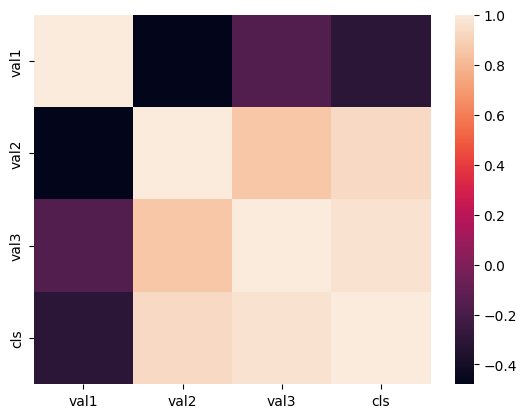

In [6]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

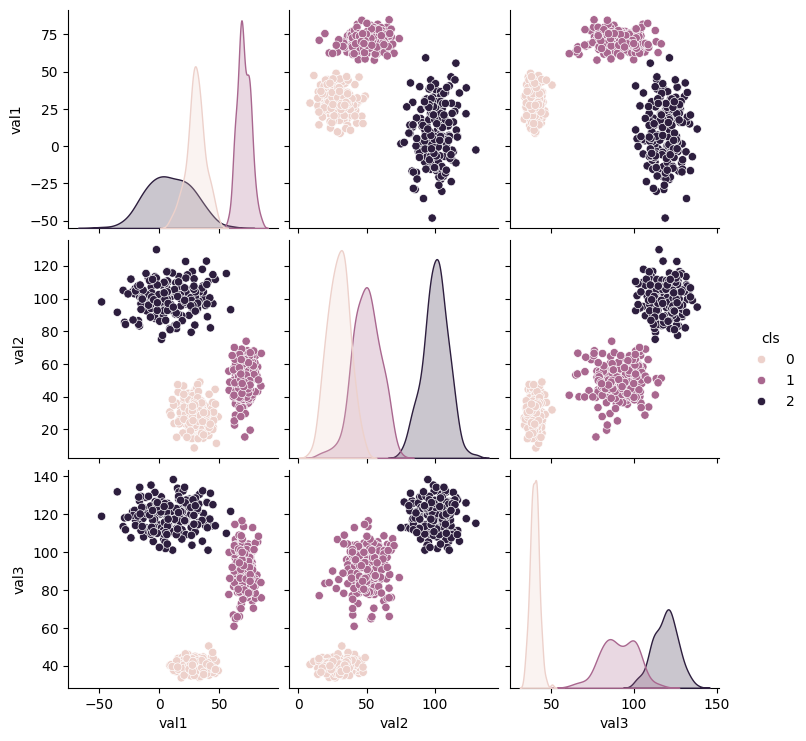

In [7]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols = [c for c in numeric_cols if c != "cls"]
sns.pairplot(df, vars=numeric_cols, hue="cls", diag_kind='kde')

## Here is our clustering class

In [8]:
class K_Means_Cluster():
  def __init__(self, k=3, iter=20):
    self.k=k
    self.iter=iter
  def fit(self, X):
    clusters={}
    used_cols = X.columns
    # add a "gue_cls" column default -1
    X["gue_cls"]=-1
    print("Starts Training...")
    # create clusters randomly
    for _ in range(self.k):
      clusters[_] = [np.random.uniform(X[col].min(),X[col].max()) for col in used_cols]
    for i in range(self.iter):
      # find the nearest cluster for each point
      for e in range(X.shape[0]):
        distances = {}
        for ki in range(self.k):
          distances[ki] = sum((X.loc[e, col] - clusters[ki][x])**2 for x, col in enumerate(used_cols))**0.5
        nearest_cluster = min(distances, key=distances.get)
        X.loc[e, 'gue_cls'] = nearest_cluster
      # assign to each cluster the mean of the points assigned to it.
      for ki in range(self.k):
        X_own = X[X.gue_cls == ki]
        clusters[ki] = [X_own[col].mean() for col in used_cols]
    print("Train in completed.")
    return X
  def plot(self, X, class_col='gue_cls'):
    numeric_cols = X.select_dtypes(include='number').columns.tolist()
    numeric_cols = [c for c in numeric_cols if c != class_col]
    sns.pairplot(X, vars=numeric_cols, hue=class_col, diag_kind='kde')

## Split the class column from df and call it X

In [9]:
X = df.drop(columns=["cls"])
X.head()

,val1,val2,val3
0,18.263074,35.701869,41.007963
1,36.518568,14.675650,38.411763
2,41.052926,31.902935,50.452659
3,15.555056,42.786065,43.923232
4,28.095084,17.645856,44.413346


# Fit the dataset and create a new dataset with new classes

In [10]:
%%time
clusterer = K_Means_Cluster(k=3,iter=30)
X_new = clusterer.fit(X)

Starts Training...
Train in completed.
CPU times: user 6.86 s, sys: 22.3 ms, total: 6.88 s
Wall time: 7.59 s


## Plot the dataset

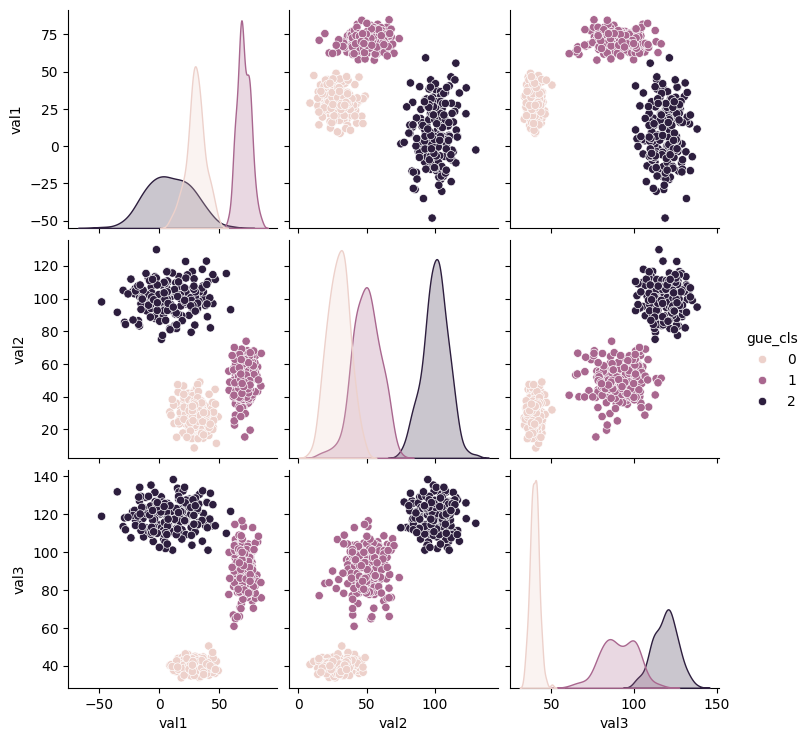

In [11]:
clusterer.plot(X_new, class_col="gue_cls")

In [12]:
X_new.gue_cls.value_counts()

,count
gue_cls,
0,200
1,200
2,200


In [13]:
X_new.gue_cls.value_counts().std()

0.0